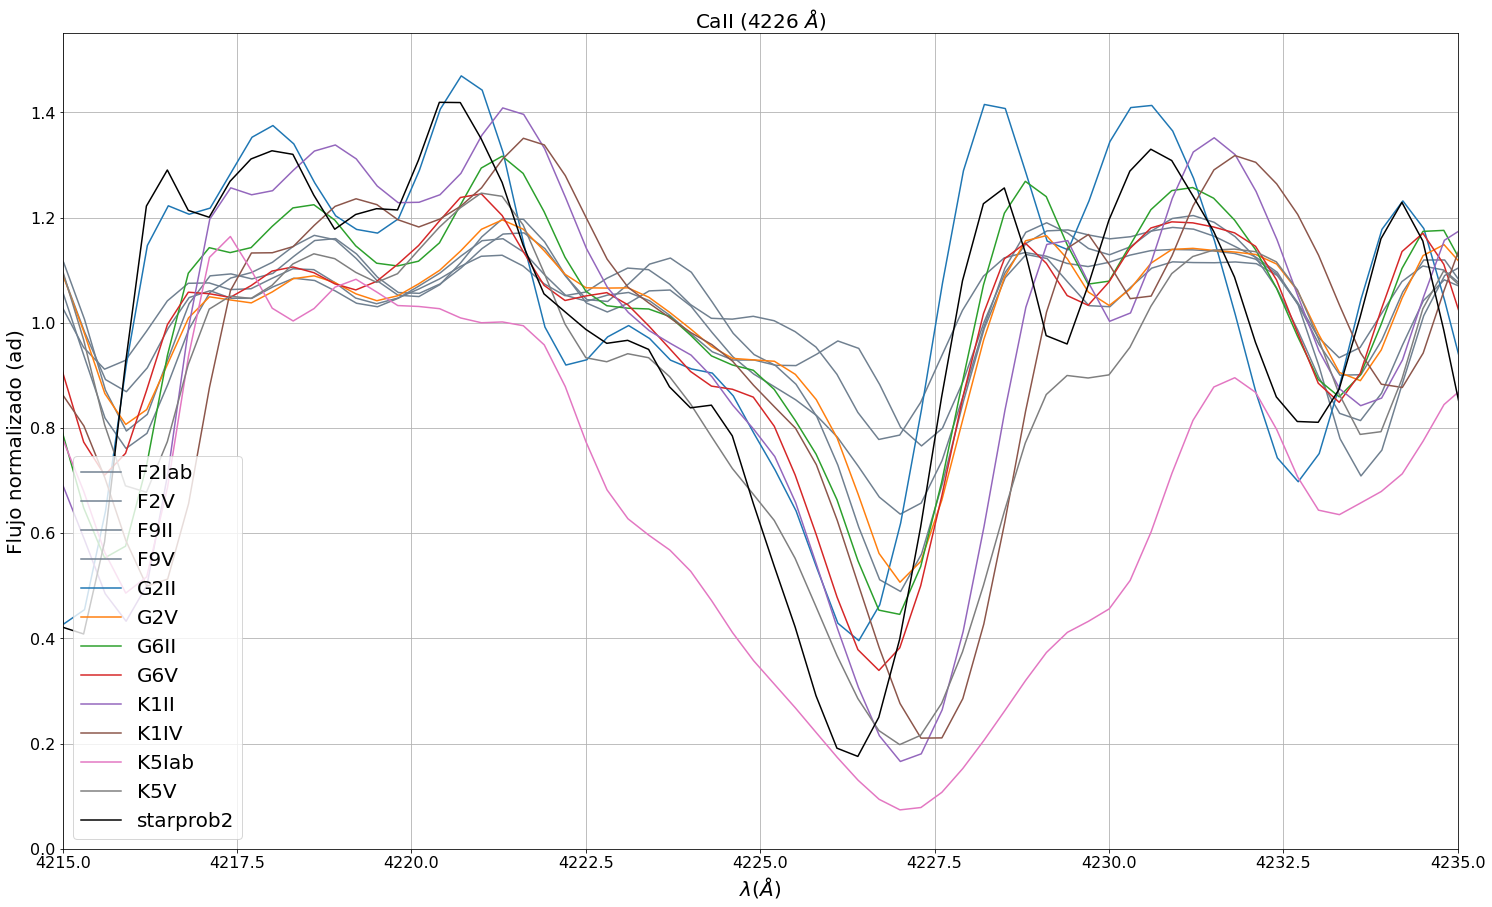

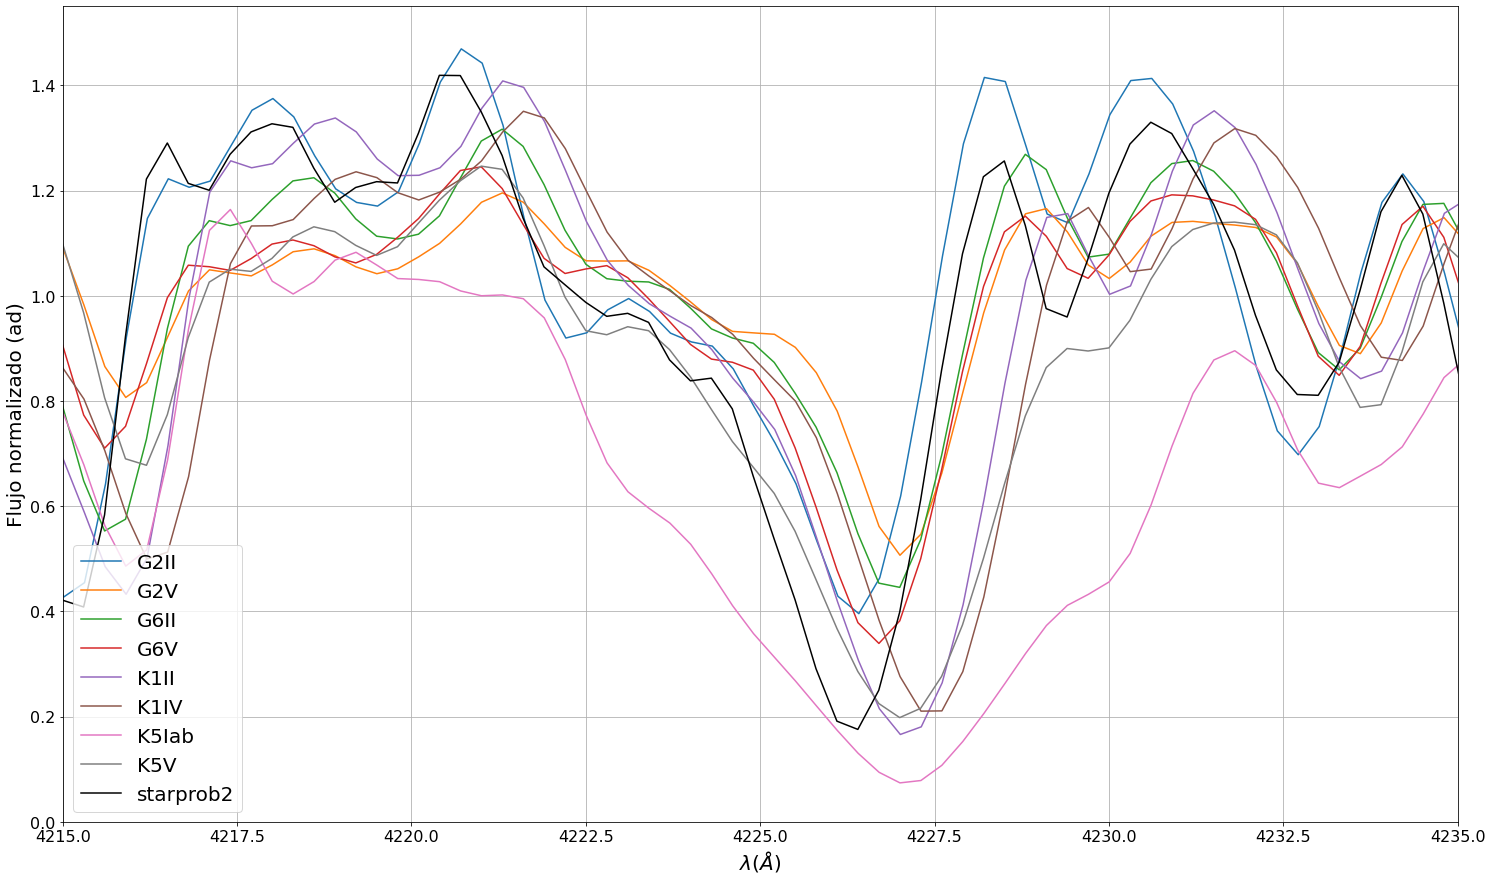

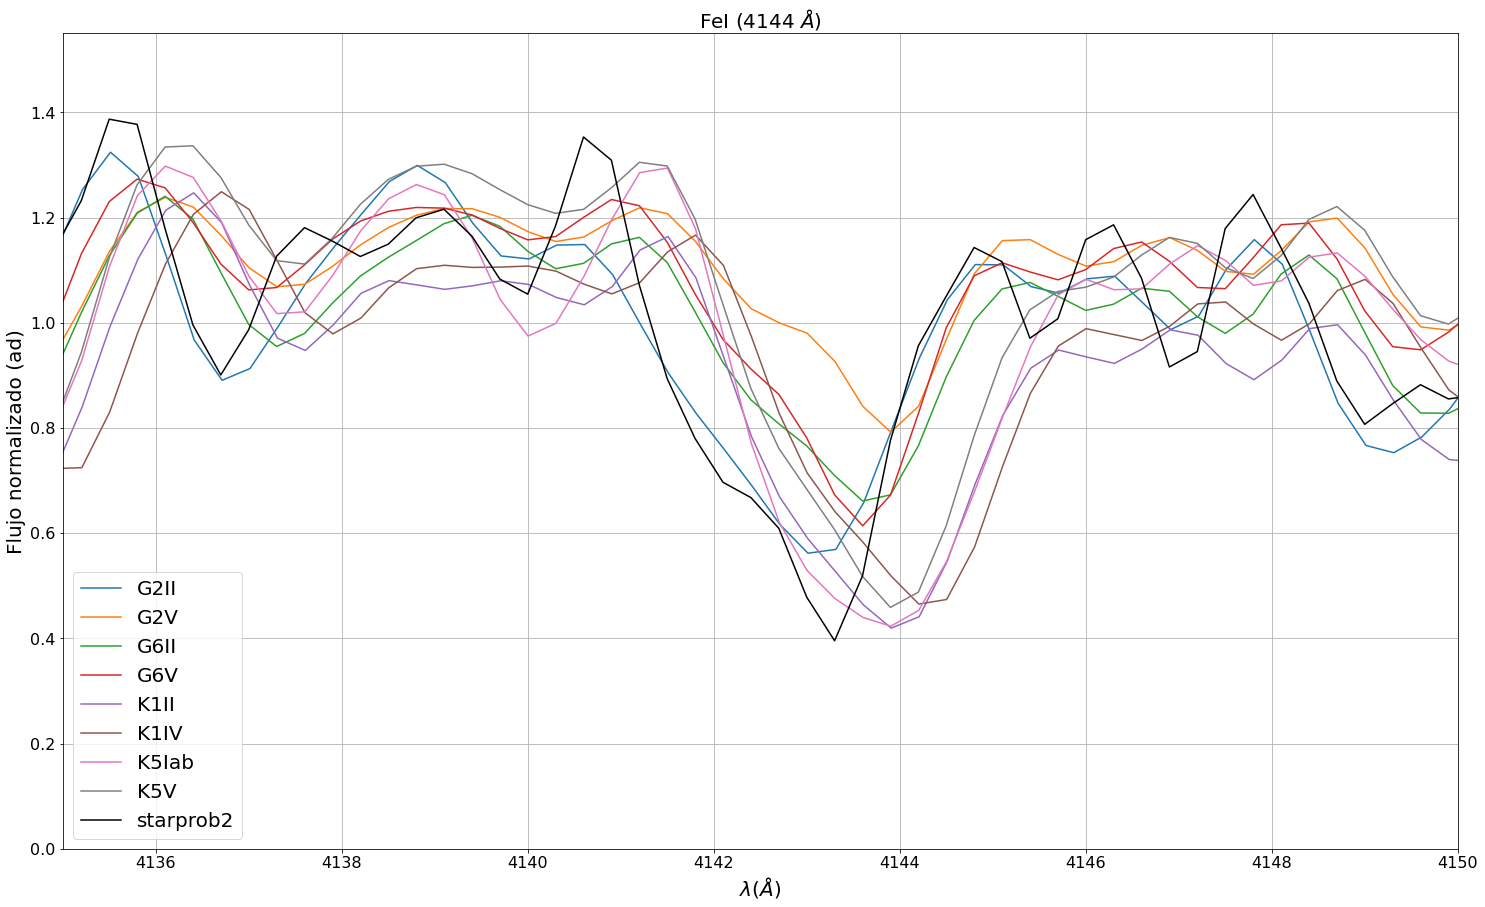

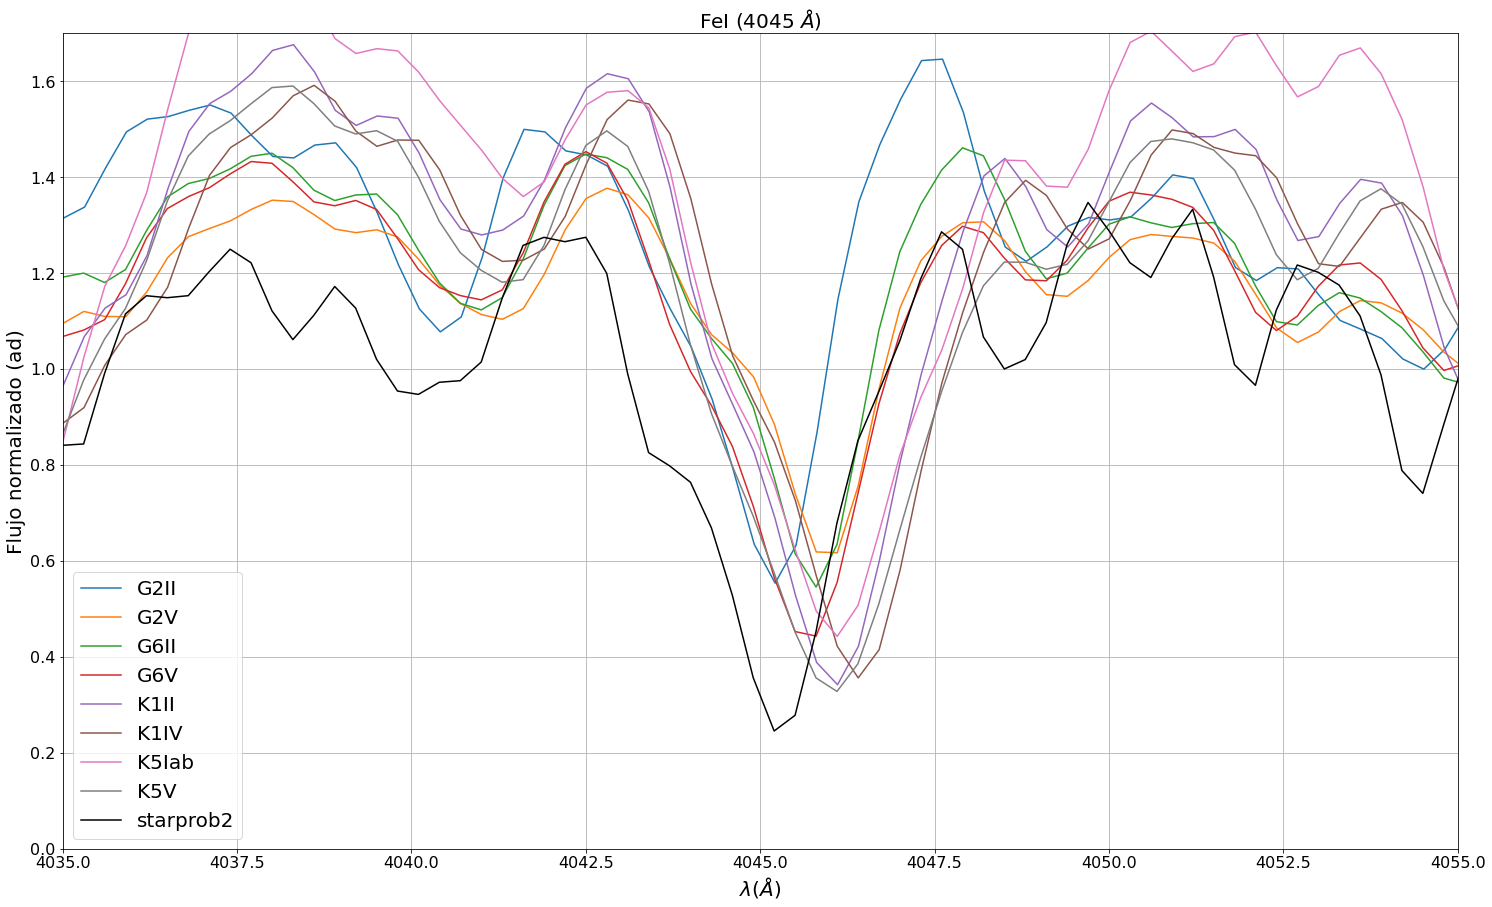

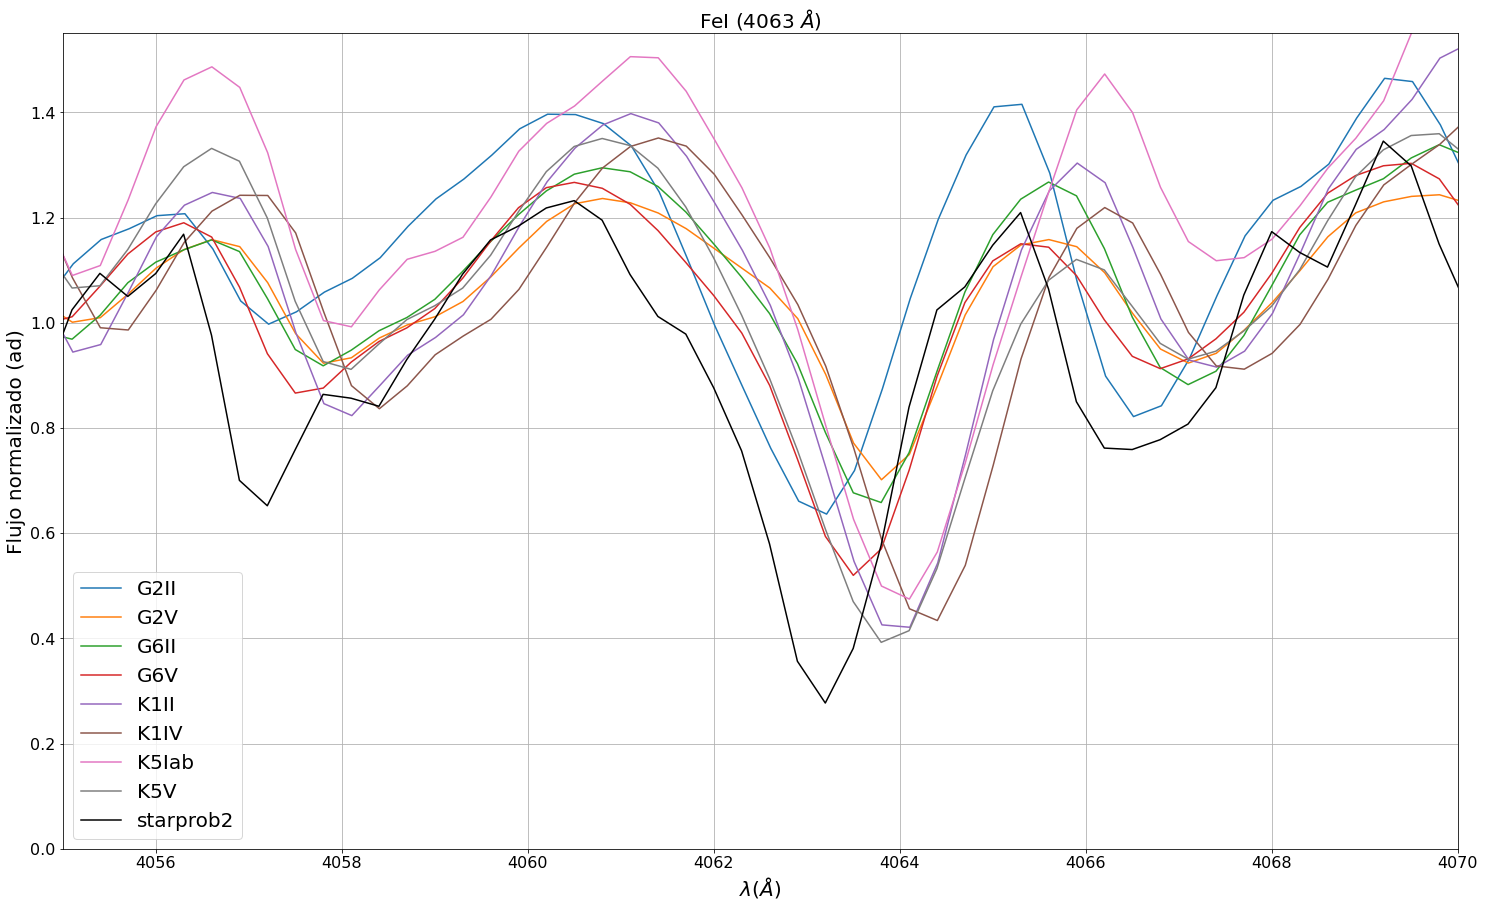

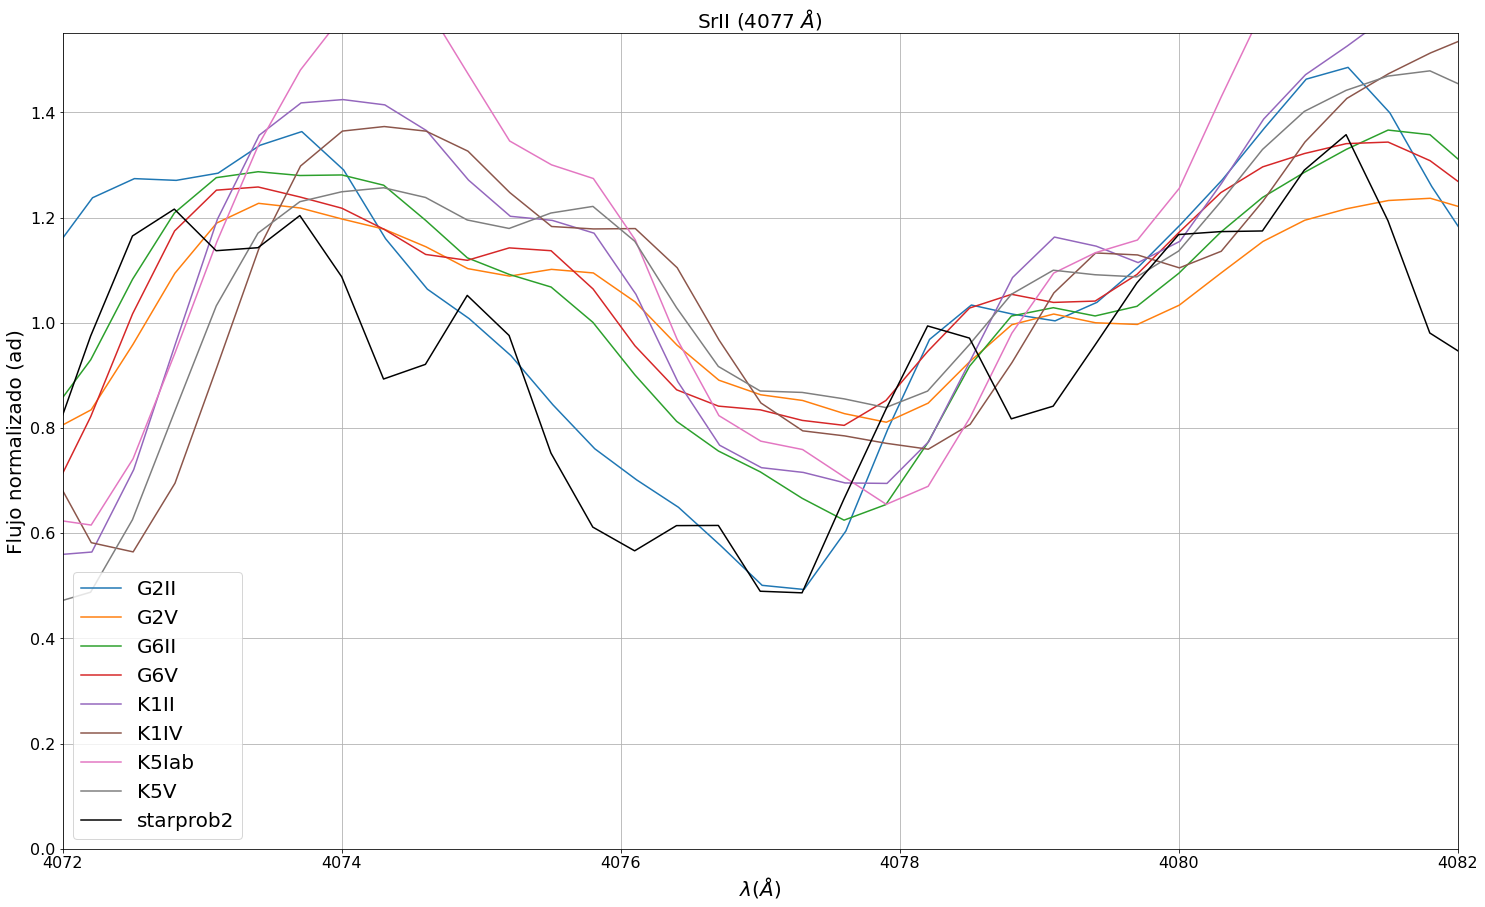

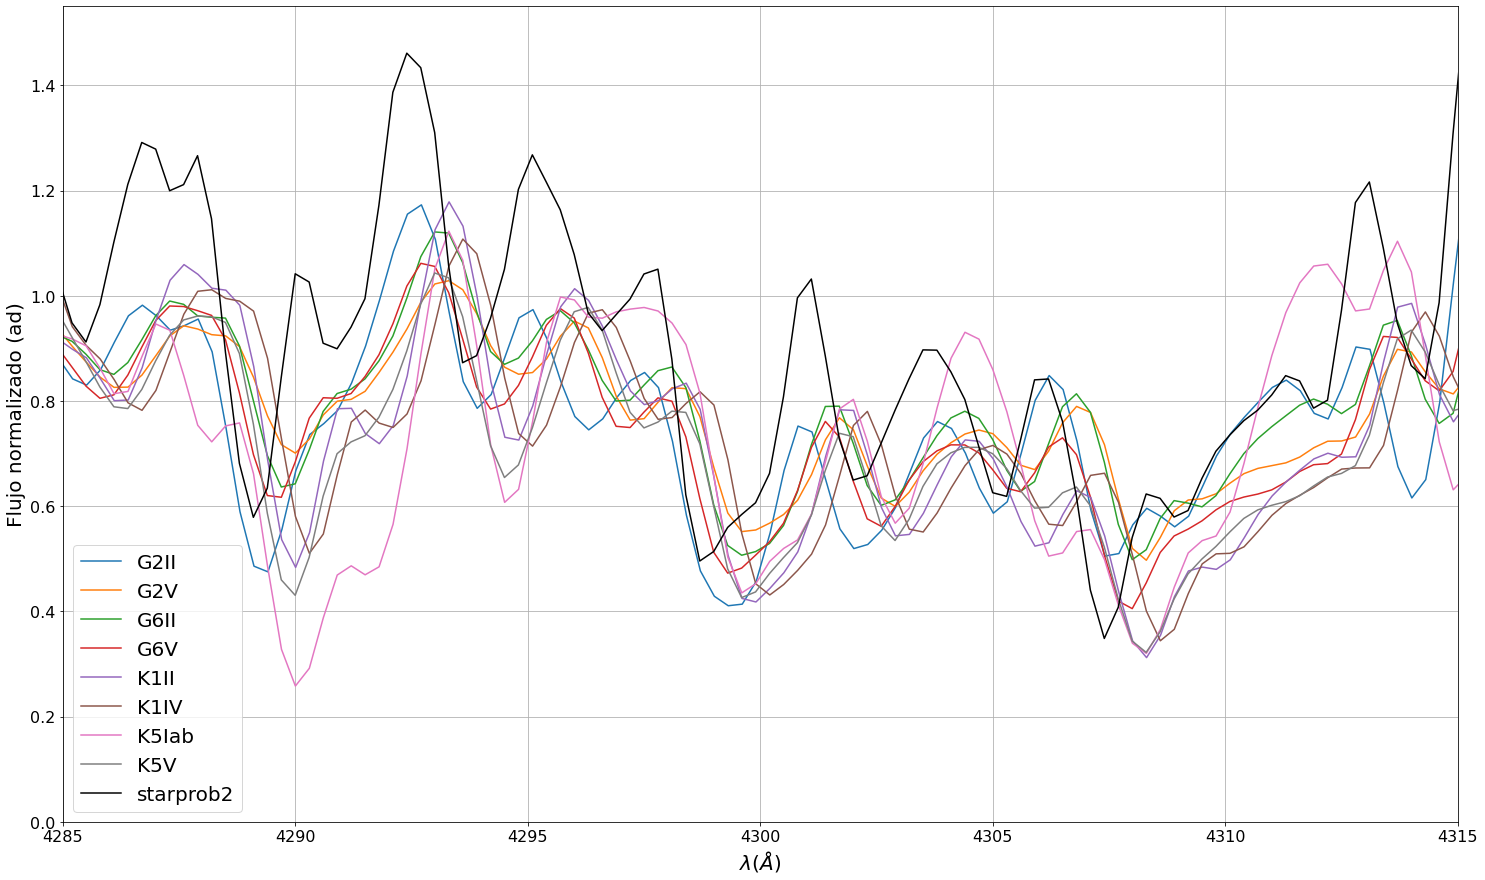

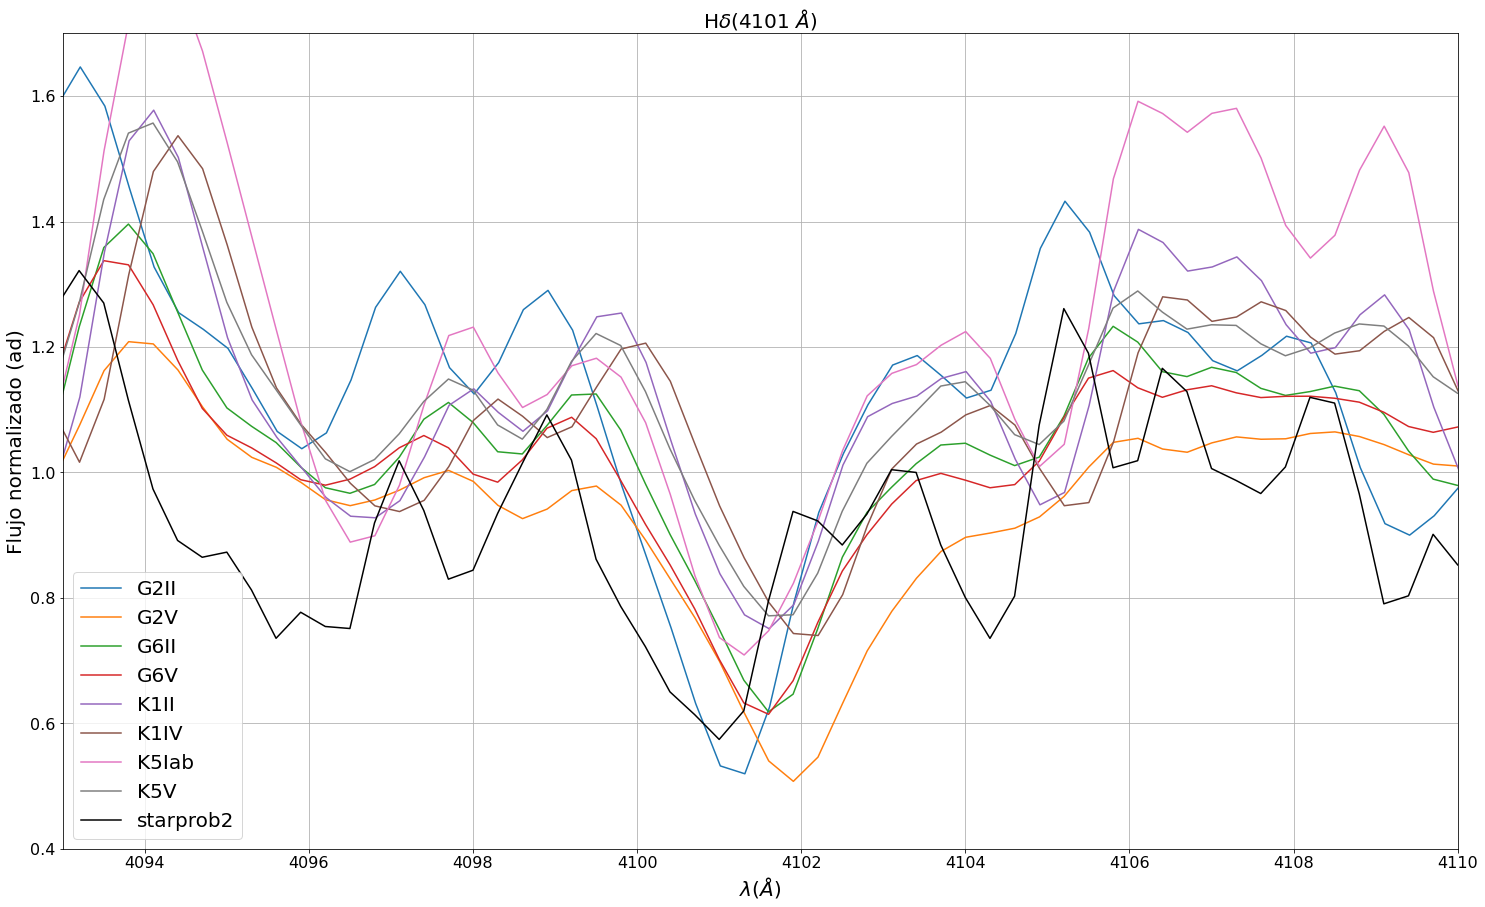

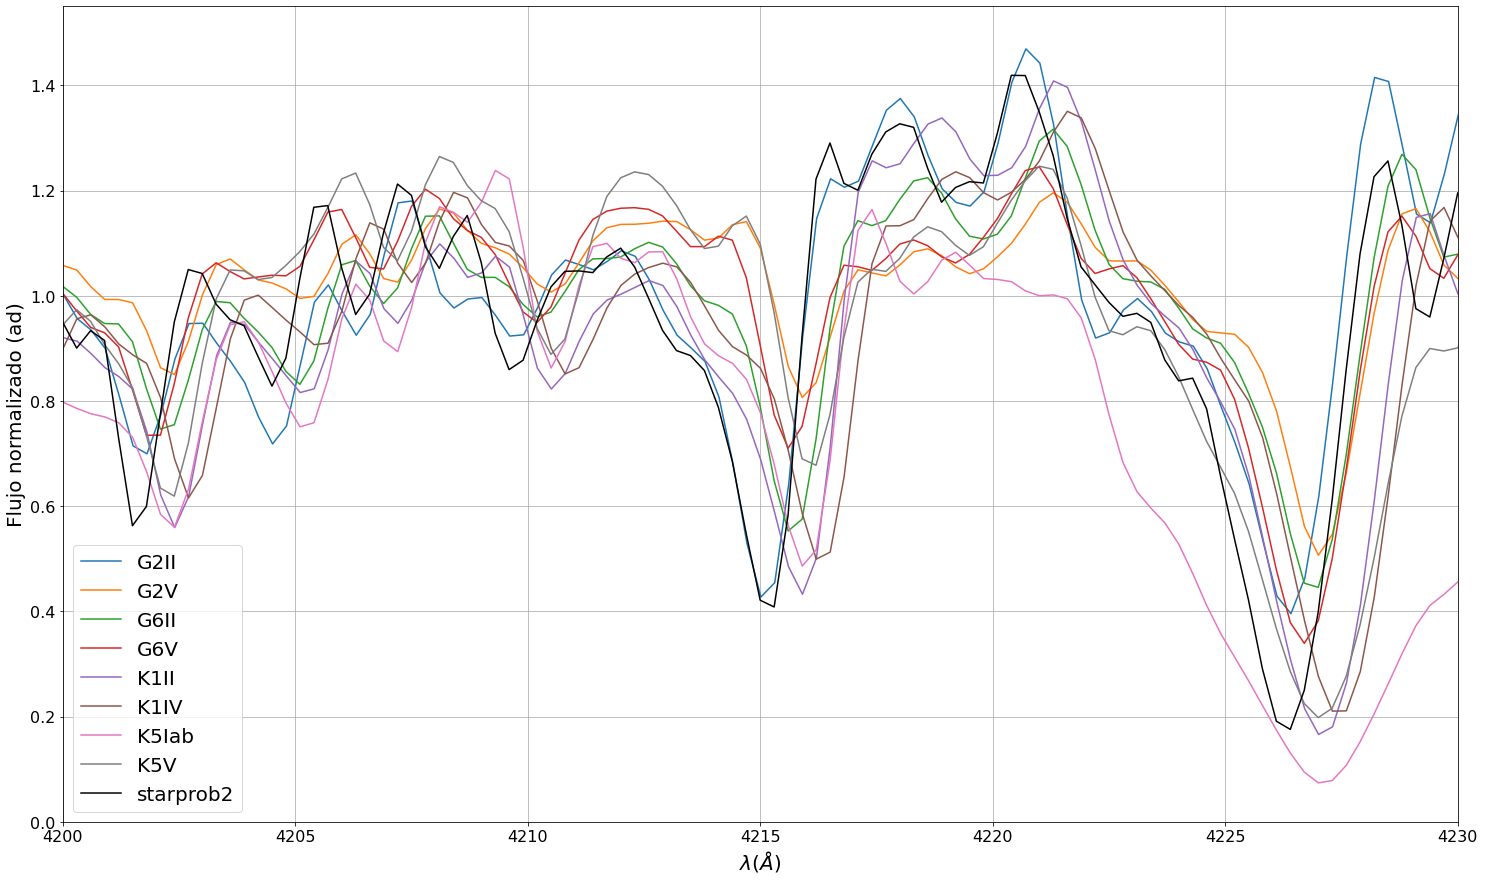

In [9]:
#----------------------------------------------------------------------------------------#
#
# This program graphs, normalizes and convolutes spectra from data given
# in POPUVES (https://www.eso.org/sci/observing/tools/uvespop.html) 
# In this case, the problem spectra have been already normalized, so we
# will just plot them.
#
# Copyright (C) 2021 Andrés García-Serra Romero <alu0101451923@ull.edu.es>
#                    Javier del Socorro Prieto  <alu0101526263@ull.edu.es>
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.





##LIBRARIES & MODULES##
import os
import os.path
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy import units as u
from astropy.visualization import quantity_support
from specutils import Spectrum1D
from specutils.manipulation import (box_smooth, gaussian_smooth, trapezoid_smooth, median_smooth)
from specutils.fitting import fit_generic_continuum
import coronagraph as cg
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve



##PLOT-FORMAT##
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels




        
##STAR NORMALIZED FLUX-WV VECTORS##
# Creating arrays to classify fluxes:
stand_stars = {}
files = os.listdir(".")
for name in files:
    if name[-3:] == "dat":
        if name[:2] == "hd":
            
            # Importing data:
            data = np.loadtxt(name,skiprows=1,delimiter="  ")
            f = open(name, 'r')
            startype = f.readline()
            startype = startype[:-1]
            lamda = [i[0] for i in data]
            flux = [i[1] for i in data]
              
            # Normalizing:
            flux = np.array(flux)
            lamda = np.array(lamda)
            flux = flux[(lamda < 5000) & (lamda > 3900)]
            lamda = lamda[(lamda < 5000) & (lamda > 3900)]
            flux = flux [5:]
            lamda = lamda [5:]
            y_continuum = 3.2 * np.exp(-0.5 * (lamda - 5.6)**2 / 4.8**2)
            flux += y_continuum
            spectrum = Spectrum1D(flux=flux*u.Jy, spectral_axis=lamda*u.AA)
            g1_fit = fit_generic_continuum(spectrum)
            y_continuum_fitted = g1_fit(lamda*u.AA)
            spec_normalized = spectrum / y_continuum_fitted
            stand_stars[startype] = spec_normalized
            
        if name[:2] == "st":
                
            # Importing data:
            data = np.loadtxt(name,delimiter="  ")
            f = open(name, 'r')
            lamda = [i[0] for i in data]
            flux = [i[1] for i in data]
            flux = np.array(flux)
            lamda = np.array(lamda)
            flux = flux[(lamda < 5000)&(lamda > 3900)]
            lamda = lamda[(lamda < 5000)&(lamda > 3900)]
            
            # Resolution change set to 3900-5000 Amstrongs with 0.3 step size:
            lammin = 3900
            lammax = 5000
            std = 7.0
            kernel = Gaussian1DKernel(stddev=std)
            theflux = convolve(flux,kernel,normalize_kernel=True, boundary='extend')
            nwl = np.arange(lammin,lammax+0.3,0.3)
            nwf = np.interp(nwl,lamda,theflux)
            
#Ordering stars alphabetically
stand_stars = collections.OrderedDict(sorted(stand_stars.items()))




            
# CaII (4226)
    #F,G,K stars:
pathname='spectra/Caii_FGKprob2_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='F':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,"slategrey",label=key)
        else:
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob2")
    plt.title("CaII (4226 "+r"$\AA$)")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4215,4235])
    plt.ylim([0,1.55])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)

    #G,K stars:
pathname='spectra/Caii_GKprob2_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='G' or key[0]=='K':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob2")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4215,4235])
    plt.ylim([0,1.55])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)
    
    
    
    
    
# FeI (4144)
    #G,K stars:
pathname='spectra/Fei4144_GKprob2_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='G' or key[0]=='K':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob2")
    plt.title("FeI (4144 "+r"$\AA$)")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4135,4150])
    plt.ylim([0,1.55])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)
    
    
    
    

# FeI (4045)
pathname='spectra/Fei4045_GKprob2_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='G' or key[0]=='K':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob2")
    plt.title("FeI (4045 "+r"$\AA$)")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4035,4055])
    plt.ylim([0,1.7])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)





# FeI (4063)
pathname='spectra/FeI4063_GKprob2_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='G' or key[0]=='K':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob2")
    plt.title("FeI (4063 "+r"$\AA$)")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4055,4070])
    plt.ylim([0,1.55])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)    

    
    
    
    
# SrII (4077)
pathname='spectra/Srii_GKprob2_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='G' or key[0]=='K':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob2")
    plt.title("SrII (4077 "+r"$\AA$)")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4072,4082])
    plt.ylim([0,1.55])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)
    
    
    

    
    
    
    
# G band (4300)
    # G,K stars:
pathname='spectra/Gband_GKprob2_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='G' or key[0]=='K':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob2")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4285,4315])
    plt.ylim([0,1.55])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)
    
    
    
    

# H delta (4101)
    #G,K stars:
pathname='spectra/Hdelta_GKprob2_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='G' or key[0]=='K':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob2")
    plt.title("H"+r"$\delta$"+"(4101 "+r"$\AA$)")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4093,4110])
    plt.ylim([0.4,1.7])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)





# CN band discontinuity (4215)
        #G,K stars:
pathname='spectra/CN_GKprob2_spectra.png'
if os.path.isfile(pathname):
    print (pathname + " already exist, delete file to upgrade data.")
else:
    plt.figure(figsize=(25,15))
    for key in stand_stars.keys():
        if key[0]=='G' or key[0]=='K':
            plt.plot(stand_stars[key].spectral_axis,stand_stars[key].flux,label=key)
    plt.plot(nwl,nwf,"k",label="starprob2")
    plt.grid("yes")
    plt.legend(loc=3)
    plt.xlim([4200,4230])
    plt.ylim([0.0,1.55])
    plt.ylabel('Flujo normalizado (ad)')
    plt.xlabel(r"$\lambda$"+r"$(\AA)$")
    plt.savefig(pathname)